<a href="https://colab.research.google.com/github/acse-xm421/ACSE-19-20/blob/master/08_GANs/08_GANs_morning/08_GANs_morning_codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1dFgNX9iQUfmBOdmUN2-H8rPxL3SLXmxn" width="400"/>


---


# **Generative Adversarial Networks (GANs)**

#### **Morning contents/agenda**

1. Why GANs?

2. Recap of generative models and VAEs

3. Formulation and training strategy

4. Implemention of a simple GAN

5. Pros and cons

6. Overview of main GAN flavours

#### **Learning outcomes**

1. Understand the basic principles of adversarial traning (with two competing networks)

2. Implementa a Generator and a Discriminator and train them with a simple GAN

3. Be aware of the importance of GANs in deep learning, its many variations, benefits, and limitations


<br>

#### **Afternoon contents/agenda**

No afternoon session. Materials provided for Wasserstein GAN (for information only, **you will NOT be assessed on WGANs**)

1. Wasserstein GANs theory and implementation example.

<br/>

---

<br/>

## 1. Why GANs?

GANs were introduced by Ian Goodfellow and others (including Yoshua Bengio) in 2014.

<center><img src="https://drive.google.com/uc?id=1RPHM4jNVmYwT0_MTttcFnpYAJdjyQ6uC" width="800"/></center>

<br>

- GANs are very effective as a tool to learn data distributions. 

- They can be used in a wide variety of applications: data generation, clustering, representation learning, translation, etc.

- GANs can handle different types of data: audio, images, video, text, etc.

<br>

There has been very significant improvement from the publication of the [original paper](https://arxiv.org/pdf/1406.2661.pdf). Results in the original publication:

<center><img src="https://drive.google.com/uc?id=1J5IAUvAv0WPp0KjdEersf41hCPI69w8v" width="600"/></center>

More complex variations on the original idea have resulted in dramatic improvements. For example:

- StyleGAN ([Paper](https://arxiv.org/pdf/1812.04948.pdf))

In [1]:
%%html
<iframe src="https://thispersondoesnotexist.com/" width="500" height="400"></iframe>

<center><img src="https://drive.google.com/uc?id=12fF1vr_SNgc5vUaY0WcA0AC87Tv64Sq5" width="800"/></center>


<br>

- cycleGAN ([Paper](https://arxiv.org/pdf/1703.10593.pdf))

<center><img src="https://drive.google.com/uc?id=1duze4mADJf-eGH1_15sNqa4bKsibThKu" width="800"/></center>

<br>


<br>

---

<br>


## 2. Recap of generative models and VAEs

Generative models are designed to find the distribution that better explains where the samples of a particular dataset come from, and then use this distribution to generate data samples.

<br>

<p align = "center"><img src="https://drive.google.com/uc?id=13yVxGyVbefU6on-QFtgS8PHHOM-CnIdE" width="300"/></p><p align = "center">
<i> <a href="https://openai.com/blog/generative-models/">image source</a></i>
</p>

<br>

but we cannot explicitly know the probability density function that describes $p_{data}(x)$. Instead we use a neural network that we will denote $G$ (Generator) to learn $p_{data}(x)$.

<br>

For a generative network $G$, and given a training real dataset:

- $G$ is a mapping function from $z$ to data space
- True data distribution $p_{data}(x)$ (<font color='green'>p̂(x)</font> in the figure)
- Generated data distribution $p_G(x)$ (<font color='blue'>p(x)</font> in the figure)


<p align = "center"><img src="https://openai.com/content/images/2017/02/gen_models_diag_2.svg" width="800"/></p><p align = "center">
<i> <a href="https://openai.com/blog/generative-models/">image source</a></i>
</p>

#### We want to find a generator $G^*$ that satisfies $p_{G^*} \approx p_{data}$

<br>

### **Adversarial loss** for the generative model:

To find optimal $G^*$, we update our network parameters to minimise the difference (divergence) between $p_{G}$ and $p_{data}$:

$$G^* = \underset{G}{\operatorname{argmin}}  Div (P_{data}(x) || P_G(x))$$

But we cannot define a simple loss function to measure this divergence explicitly.

As we saw yesterday, VAEs training is based only on the evidence lower bound (ELBO), a surrogate (lower bound) of the likelihood. Additionally, the loss used in VAE often are a bit limited in how they measure good network performance.

Recap of training a VAE:

1. Sample $x_i$ from training data.
2. Train an Encoder$(x_i) \rightarrow z_i$ and a Decoder$(z_i) \rightarrow \hat{x}_i$ by using an explicit pixel-wise loss (like MSE).
3. After training is complete, sample $z \approx p(z)$ to generate new data using the decoder.

Consquences of using MSE loss in VAEs:

- Pixel-wise losses are not 'intelligent' enough
- Blurry outputs

<p align = "center"><img src="https://drive.google.com/uc?id=1-m99v3GlBjhWWI1jZC1x0WR7o7pupYsq" width="600"/></p><p align = "center">
<i> which image is perceptually better? </a></i>
</p>

<br>

Later today we will implement a simple GAN and confirm that it produces sharper images than the VAE we implemented yesterday:

<br>

<p align = "center"><img src="https://drive.google.com/uc?id=1GY4bhQ01eEWGZdx_9oqR0tk7hs_JUGo6" width="400"/></p><p align = "center">
<i> VAE results on MNIST </a></i>
</p>

<br>

<p align = "center"><img src="https://drive.google.com/uc?id=1fXftd0wG_wKAooG_EZUTmXGhnuGc8L53" width="400"/></p><p align = "center">
<i> GAN results on MNIST </a></i>
</p>

<br>


GANs provide a method to directly optimise $G^* = \underset{G}{\operatorname{argmin}}  Div (P_{data}(x) || P_G(x))$ by using another network called a **Discriminator** for the loss function – the **adversarial loss**.


Training GAN $\rightarrow$ minimising J-S divergence (but other divergences/distances can also be used)

The advantages of GANs compared to VAEs are:

- Loss function used is more 'flexible' and 'intelligent'.
- It produces perceptually better results than VAEs' MSE loss.



<br>

---

<br>


## 3. Formulation and training strategy


<center><img src="https://drive.google.com/uc?id=166bm5GMoWPS5kQxA4Pt3LOk1mqf73FkS" width="800"/></center>

<br>

To generate realistic samples from $G(z)$, we play a zero-sum competition game:

- Train $D$ to **correctly label** its inputs as *REAL* or *FAKE*

- Train $G$ to **'fool'** $D$ to label $G(z)$ as a *REAL* sample

In this way, both Generator and Discriminator improve as the training workflow progresses: $G$ gets better at generating *FAKE* samples, because $D$ is getting better at spotting them. The optimal solution would be met when:

$$ {G: p_G = p_{data}} $$

<br>

To play this zero-sum game, we use a **min-max loss function**:

<br>
$$\boxed {\underset{G}{\operatorname{min}} \underset{D}{\operatorname{max}}  V_{GAN} (G,D) = \mathbb{E}_{x \sim p_{data}(x)} [\log D(x)] 
+ \mathbb{E}_{z \sim p_{z}(z)} [\log(1 - D(G(z)))]} $$ 

<br>

This equation means:
1. Train $D$ to maximise the loss, so that:
  - when input is *REAL*: $\, \, D(x) \rightarrow 1$
  - when input is *FAKE*: $\, \, D(G(z)) \rightarrow 0$

2. Train $G$ to minimise the loss:
  - 'Fools' $D$ to output a high-score when when input is *FAKE*: $\, \, D(G(z)) \rightarrow 1$


A visual representation of the training process (image adapted from the [original paper](https://arxiv.org/pdf/1406.2661.pdf)):

<br>

<center><img src="https://drive.google.com/uc?id=1ZmEJOigye_0hb9_PdHla-52-x_uYYEW-" width="800"/></center>

<br>

As we mentioned above, we are playing a zero-sum game. But what does this means? A zero-sum game is a mathematical representation of a situation involving two players (or more) where the gains of one player equal the losses of the other. In the context of GANs, what it means that if the Generator gets better, by definition, the Discriminator must get worse. That does not mean that both of them can't get better if we train them in an alternate way, which is exactly what we do in GANs.

When we have a look at the loss curves for a GANs, we should see this kind of behaviour:

<br>

<center><img src="https://drive.google.com/uc?id=1IbN8wG8KdELj6aCtkh1UqGNpZ6TGPAXR" width="400"/></center>

<br>


When we train the discriminator $D$, we obtain this expression:

$$D^*(x) = {\underset{D}{\operatorname{argmax}}} \left[ p_{data}(x) \log{D(x)} + p_G(x) \log{(1-D(x))} \right] = \frac{p_{ data}(x) }{ p_{data}(x) + p_G(x) }$$


Substituting this into the loss expression gives us:

<br>

$$ V_{GAN} (G,D^*) = \mathbb{E}_{x \sim p_{data}(x)} \left[\frac{p_{data}(x) }{ p_{data}(x) + p_G(x) }  \right] + \mathbb{E}_{x \sim p_G} \left[\frac{p_G(x)}{ p_{data}(x) + p_G(x) }  \right] \\[20pt] = - \log(4) + 2 JSD (p_{data} || p_G) $$

<br>

\[**NOTE**: you can find the full derivation in the original paper by Goodfellow\]

<br>

So, when we train GANs we following this workflow:

<br>

<center><img src="https://drive.google.com/uc?id=1om1rv0un8TWKifoo35iiu_ukphLsQ138" width="800"/></center>

<br>




##### **Intuitive explanation of GANs training procedure**:

We can interpret GANs as a competition between a ***Forger*** ($G$) and a ***Detective*** ($D$):

<br>

<center><img src="https://miro.medium.com/max/1400/1*-gFsbymY9oJUQJ-A3GTfeg.webp" width="800"/> <br> <a href="https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f"> <i> image source </i>  </a> </center>

<br>



But it is better to thing of it in terms of a ***teacher*** ($D$) and a ***student*** ($G$). Interaction between $G$ and $D$:

1. $D$ is leading $G$:
  - $D$ is trained first
  - $D$ provides knowledge to update $G$

2. $D$ needs to teach adapting to the level of $G$:
  - Measure the distance between current $p_G$ and $p_{data}$

<br>

<center><img src="https://drive.google.com/uc?id=1_VwpWfWZlr-ijrK3wUKNOFEO3nwuWb3t" width="800"/> <br> <a href="https://robots.media.mit.edu/wp-content/uploads/sites/7/2021/03/EAAI-What-are-GANs_.pdf"> <i> image source </i> </a> </center>

<br>




In [2]:
%%html
<iframe src="https://poloclub.github.io/ganlab/" width="1200" height="600"></iframe>

<br>

---

<br>

## 4. Implemention of a simple GAN

A few imports before we get started

In [3]:
!pip install livelossplot
%pylab inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Populating the interactive namespace from numpy and matplotlib


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

from livelossplot import PlotLosses

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

import random 
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = False

    return True

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Cuda installed! Running on GPU!


In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


We will implement a simple GANs using the MNIST dataset.

- The Generater network ($G$) consists of 4 Linear layers;
- the Discriminator network ($D$) is a classifier and consists of 4 Linear layers.
- Latent vector length: 100

Network $G$:
1. Layer 1: 100 $\rightarrow$ 256 (100 is length of latent vector)
2. Layer 2: 256 $\rightarrow$ 512
3. Layer 3: 512 $\rightarrow$ 1024
4. Layer 4: 1024 $\rightarrow$ 784 (size of a MNIST image)

Apply [`LeakyReLU`](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html) with (alpha=0.2) activation functions for layers 1-3, and `tanh` to layer 4.

\[**NOTE**: `LeakyReLU` helps to mitigate Vanishing gradient problem\]

<br>

Network $D$:
1. Layer 1: 784 $\rightarrow$ 1024 
2. Layer 2: 1024 $\rightarrow$ 512 
3. Layer 3: 512 $\rightarrow$ 256 
3. Layer 4: 256 $\rightarrow$ 1

Apply leaky_relu(alpha=0.2) activation functions for layers 1-3, and sigmoid to layer 4. Can also apply low rate dropout (0.3) at layers 1-3.

\[**NOTE**: We want to **label if input is a real image**, NOT to find which number is in the image\]

Note although here we have used the Linear layers for MNIST, for larger image-sized implementations, it usually uses convolutional layers as they are better suited for image problems.

In [6]:
class Generator(nn.Module):
    def __init__(self, g_input_dim=100, g_output_dim=28*28):
        super().__init__()       
        self.fc1 = nn.Linear(g_input_dim, 256)### your code goes here
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features*2)### your code goes here
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features*2) ### your code goes here
        self.fc4 =  nn.Linear(self.fc3.out_features, g_output_dim)### your code goes here
    
    # forward methodtorch.flatten()
    def forward(self, x): 
        x = F.leaky_relu(self.fc1(torch.flatten(x, start_dim = 1)),0.2)### your code goes here
        x = F.leaky_relu(self.fc2(x),0.2)### your code goes here
        x = F.leaky_relu(self.fc3(x),0.2)### your code goes here
        return F.tanh(self.fc4(x))### your code goes here
    
class Discriminator(nn.Module):
    def __init__(self, d_input_dim=28*28):
        super().__init__()
        self.fc1 = nn.Linear(d_input_dim, 1024)### your code goes here
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features//2)### your code goes here
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features//2)#### your code goes here
        self.fc4 = nn.Linear(self.fc3.out_features, 1)#### your code goes here
        self.dropout = nn.Dropout(0.3)
    
    # forward method
    def forward(self, x):
        x = F.leaky_relu(self.fc1(torch.flatten(x, start_dim = 1)),0.2)### your code goes here
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x),0.2)### your code goes here
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x),0.2)### your code goes here
        x = self.dropout(x)
        return F.sigmoid(self.fc4(x))### your code goes here
    

# build model
G = Generator().to(device)
D = Discriminator().to(device)

Print $G$ and $D$

In [7]:
G

Generator(
  (fc1): Linear(in_features=100, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=784, bias=True)
)

In [8]:
D

Discriminator(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Loss and hyper-parameters:
- Loss criterion: BCELoss
- batch_size = 100
- learning_rate = 0.0002
- Optimiser: Adam

In [9]:
# define loss
criterion = nn.BCELoss()### your code goes here
z_dim = 100
bs = 100  ## batch_size


# optimiser
lr = 0.0001 
G_optimizer = optimizer = torch.optim.SGD(G.parameters(), lr=lr)### your code goes here
D_optimizer = optimizer = torch.optim.SGD(D.parameters(), lr=lr)### your code goes here

In [10]:
# MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))])

train_dataset = MNIST(root='./mnist_data/', train=True, transform=transform, download=True)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



#### **Comments on the transform `transforms.Normalize(mean=(0.5), std=(0.5))])`**

In principle you would like to normalise the dataset properly as we have been doing so far. But if you try these values (mean of MNIST is 0.1307 and it's standard deviation is 0.3081), the GAN does not train properly at all. See [this](https://discuss.pytorch.org/t/gan-training-fails-for-different-image-normalization-constants/10574/4) where someone reports the same behaviour, and a potential solution by adding fancy modifications to the network. This is one of the many reasons why GANs are difficult to train.

#### **Question**:
We are not splitting the data now, why? 

In fact, we did not even bother downloading the test dataset... why? Are we not going to check how well our network **generalises**?

<br>

<br>

As we learned, GANs aims to let the generator and the discriminator compete, here are the steps to set up a training workflow in GANs:

1. Fix $G$, train $D$ to distinguish between real images $x$ and generated fake images $G(z)$:
  * $D(x) \rightarrow$ *high score*
  * $D(G(z)) \rightarrow$ *low score*

2. Fix $D$, train $G$ to "fool" $D$:
  * sample a vector $z$,
  * generate a fake image $G(z)$,
  * input $G(z)$ into $D$,
  * train $G$ to increase the score of $D(G(z))$ (here $G$ and $D$ can be understood as one combined network, but layers of $D$ are frozen).

\[**NOTE**: If you found one of the losses becomes zero at the first several epochs, it means the training is not robust due to the initialisation (one network outperforms the other and the other cannot catch up anymore). In this case, we need to restart the process.\]

Define a training loop for $D$:

In [11]:
def D_train(x):
    #-------------- Function of the discriminator training -------------------#
    D.train()
    D_optimizer.zero_grad()

    # train discriminator on real data -- assign high score (use 1 here)
    x_real, y_real = x.view(-1, 28*28), torch.ones(bs, 1)  # we are assigning the label 'real data' to the samples (don't care anymore about what number they are)
    x_real, y_real = x_real.to(device), y_real.to(device)

    D_output = D(x_real)### your code goes here
    D_real_loss = criterion(D_output, y_real)### your code goes here

    # train discriminator on fake data -- assign low score (use 0 here)
    # sample vector and produce generator output
    z = torch.randn(bs, z_dim).to(device)
    x_fake, y_fake = G(z), torch.zeros(bs, 1).to(device)

    D_output = D(x_fake)### your code goes here
    D_fake_loss = criterion(D_output, y_fake)### your code goes here

    # combine the losses
    D_loss = D_real_loss+D_fake_loss### your code goes here

    # model update 
    D_loss.backward()
    D_optimizer.step()
        
    return  D_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached

and for $G$:

In [12]:
def G_train(x):
    #-------------- Function of the generator training -------------------#
    G.train()
    G_optimizer.zero_grad()

    # sample vector and produce generator output
    z = torch.randn(bs, z_dim).to(device)### your code goes here
    G_output = G(z) ### your code goes here

    # obtain scores from D for the generated data
    D_output = D(G_output) ### your code goes here

    # train generator to "fool" discriminator
    y = torch.ones(bs, 1).to(device)
    G_loss = criterion(D_output, y)### your code goes here

    # model update 
    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached

And loop over epochs to train:

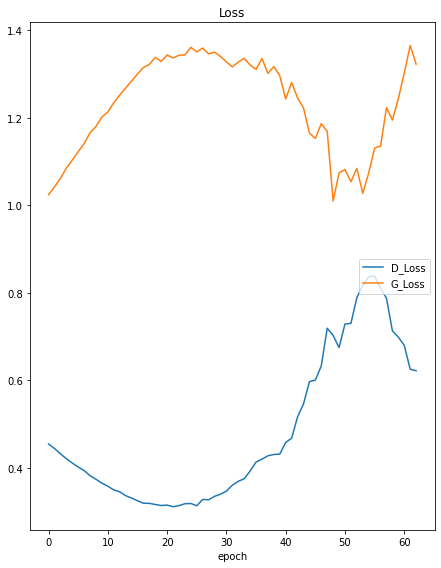

Loss
	D_Loss           	 (min:    0.311, max:    0.838, cur:    0.622)
	G_Loss           	 (min:    1.009, max:    1.365, cur:    1.323)


In [ ]:
import numpy as np
n_epoch = 140 # about 40 minutes
groups = {'Loss': ['D_Loss', 'G_Loss']}
liveloss = PlotLosses(groups=groups)

for epoch in range(1, n_epoch+1):  
  D_losses, G_losses = [], []
  logs = {}
  for batch_idx, (x, _) in enumerate(train_loader):      # _ is just a throwaway variable that we don't use # throw labels
    logs['D_Loss'] = D_train(x)
    logs['G_Loss'] = G_train(x)
  liveloss.update(logs)
  liveloss.draw()

  # save every 20th epochs
  if(np.mod(epoch, 20) == 0):
    torch.save(G.state_dict(), "./Generator_{:03d}.pth".format(epoch))

where we observe the quintessential behaviour of GANs losses.

#### Sample random latent vectors, and input into generator to generate new images.

Text(0.5, 1.0, 'Epoch = 020')

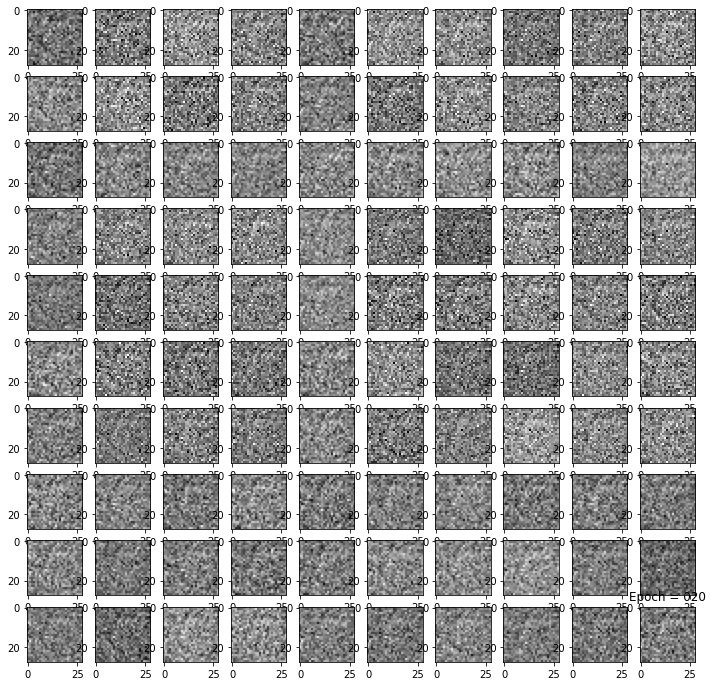

In [14]:
# from torchvision.utils import save_image
set_seed(0)

epoch = 20  ## get the model after 20 epochs and use it:
G.load_state_dict(torch.load("./Generator_{:03d}.pth".format(epoch)))


with torch.no_grad():
    test_z = torch.randn(bs, z_dim).to(device)
    generated = G(test_z)

    # save_image(generated.view(generated.size(0), 1, 28, 28), './sample_' + '.png')
fig, axarr = plt.subplots(10, 10, figsize=(12, 12))
for ax, img in zip(axarr.flatten(), generated.view(generated.size(0), 28, 28).cpu()):
  ax.imshow(img, cmap="gray")
plt.title('Epoch = {:03d}'.format(epoch))

In [15]:
# from torchvision.utils import save_image
set_seed(0)

epoch = 60
G.load_state_dict(torch.load("./Generator_{:03d}.pth".format(epoch)))


with torch.no_grad():
    test_z = torch.randn(bs, z_dim).to(device)
    generated = G(test_z)

    # save_image(generated.view(generated.size(0), 1, 28, 28), './sample_' + '.png')
fig, axarr = plt.subplots(10, 10, figsize=(12, 12))
for ax, img in zip(axarr.flatten(), generated.view(generated.size(0), 28, 28).cpu()):
  ax.imshow(img, cmap="gray")
plt.title('Epoch = {:03d}'.format(epoch))

FileNotFoundError: ignored

In [ ]:
# from torchvision.utils import save_image
set_seed(0)

epoch = 140
G.load_state_dict(torch.load("./Generator_{:03d}.pth".format(epoch)))


with torch.no_grad():
    test_z = torch.randn(bs, z_dim).to(device)
    generated = G(test_z)

    # save_image(generated.view(generated.size(0), 1, 28, 28), './sample_' + '.png')
fig, axarr = plt.subplots(10, 10, figsize=(12, 12))
for ax, img in zip(axarr.flatten(), generated.view(generated.size(0), 28, 28).cpu()):
  ax.imshow(img, cmap="gray")
plt.title('Epoch = {:03d}'.format(epoch))

In [ ]:
# from torchvision.utils import save_image
set_seed(0)

epoch = 200
G.load_state_dict(torch.load("./Generator_{:03d}.pth".format(epoch)))


with torch.no_grad():
    test_z = torch.randn(bs, z_dim).to(device)
    generated = G(test_z)

    # save_image(generated.view(generated.size(0), 1, 28, 28), './sample_' + '.png')
fig, axarr = plt.subplots(10, 10, figsize=(12, 12))
for ax, img in zip(axarr.flatten(), generated.view(generated.size(0), 28, 28).cpu()):
  ax.imshow(img, cmap="gray")
plt.title('Epoch = {:03d}'.format(epoch))

Compare against **VAE** result (using a VAE network with similar complexity):

<br>

<center><img src="https://drive.google.com/uc?id=1GY4bhQ01eEWGZdx_9oqR0tk7hs_JUGo6" width="500"/> <i> <br>VAE result </i></center>

<br>


<br>

---

<br>

## 5. **Pros** & **Cons**

- GANs produce “sharper” and more “perceptually realistic” results

<br>

- VAEs are stable in training, and converge faster
- GANs are hard to train, and have unclear stopping criteria

<br>

- VAEs provide generative model and inference model in a single network
  - Learn an encoder-decoder pair
- GANs only provide a generative model

<br>

- VAEs are better justified theoretically
- GANs **implicitly** maximise likelihood through the combination of two networks

<br>

---

<br>

## 6. Overview of main GAN flavours

There are many different variations or flavours based on the original idea of using two competing networks.

Based on the objective function (loss) used:

<br>

<center><img src="https://drive.google.com/uc?id=1ZbbmIsqb_Y8DSew7ynZx2OPE2FRUMp-w" width="700"/> </center>

<br>

---

<br>

<center><img src="https://drive.google.com/uc?id=1hga3rZYlJcJWNho7lsEk4T7nS9zfoMdy" width="700"/> </center>

<br>

---

<br>

<center><img src="https://drive.google.com/uc?id=12y0Ri1zzTLAb6FWz4BCB55ItZmVkVQsC" width="700"/> </center>

<br>

---

<br>

<center><img src="https://drive.google.com/uc?id=1kjyGES9AnLWwLwlx4FUMw03DzshuHFb9" width="700"/> </center>

<br>

---

<br>

<center><img src="https://drive.google.com/uc?id=1QGp-dmCGLKNdzIcxyJPNPLX0qNIAwB7u" width="700"/> </center>

<br>

---



Some references for images used in figures above:

- [WGANs](https://arxiv.org/pdf/1701.07875.pdf)
- [cycle GANs](https://junyanz.github.io/CycleGAN/)
- [star GANs](https://openaccess.thecvf.com/content_cvpr_2018/papers/Choi_StarGAN_Unified_Generative_CVPR_2018_paper.pdf)
- [Progressively growing GANs](https://arxiv.org/abs/1710.10196)